# Load packages
Once we have used the decode_lab_code.readers.ioreaders to save ephys data into the NWB files, we can now use that standard format with a variety of packages!!

One should note that the NWB file may have different Indexing names depending on the dataset. For this lab, those names (unit, ElectricalSeries, epoch) will remain fixed.

In [1]:
from decode_lab_code.readers.ioreaders import load_nwb
import matplotlib.pyplot as plt
import numpy as np
import pynapple as nap
import os

folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS'
nwbname = 'nwbfile.nwb'
nwbpath = os.path.join(folder_path,nwbname)

Cite pynwb, neo, and CatalystNeuro team
Please note, if there are multiple start/stops, more data is collected after a stopping recording. You must trim the CSC.
TODO: MUST CHECK ALL SLICING FOR [a:b], MUST BE [a::b]


In [3]:
nwbfile_dc=load_nwb(nwbpath = os.path.join(folder_path,nwbname))

In [4]:
nwbfile_dc.electrodes.to_dataframe()
#nwbfile_dc.units.to_dataframe()

,location,group,group_name,label
id,,,,
0,PFC,Tetrode1 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode1,CSC1
1,PFC,Tetrode1 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode1,CSC2
2,PFC,Tetrode1 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode1,CSC3
3,PFC,Tetrode1 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode1,CSC4
4,PFC,Tetrode2 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode2,CSC5
5,PFC,Tetrode2 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode2,CSC6
6,PFC,Tetrode2 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode2,CSC7
7,PFC,Tetrode2 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode2,CSC8
8,PFC,Tetrode3 pynwb.ecephys.ElectrodeGroup at 0x116...,Tetrode3,CSC9


# NWB to Pynapple

Pynapple is used to visualize and analyze your data. It supports various analytical procedures, like cross-correlograms, circular statistics approaches (head direction analysis), and bayesian decoding.

### Now that we have data in the NWB format, we can use Pynapple

In [5]:
data = nap.load_file(nwbpath)
print(data)

nwbfile
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys             │ Type        │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units            │ TsGroup     │
│ epochs           │ IntervalSet │
│ ElectricalSeries │ TsdFrame    │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙


Print out general statistics about neurons

In [6]:
spikes = data["units"]
spikes

  Index    rate  quality    location
-------  ------  ---------  ----------
      0    5.85  good       PFC
      1    0.08  good       PFC
      2    2.02  good       PFC
      3    0.17  good       PFC
      4    0.7   good       PFC
      5    6.01  good       PFC
      6    8.05  good       PFC
      7    0.12  good       PFC
      8    0.35  good       PFC
      9    1.2   good       PFC
     10    0.07  good       PFC
     11    2.8   good       PFC
     12    0.14  good       PFC
     13    0.29  good       PFC
     14    0.72  good       PFC
     15    2.9   good       PFC
     16    0.06  good       PFC
     17    3.93  good       PFC
     18    0.76  good       PFC
     19    2.1   good       PFC
     20    1.53  good       PFC
     21    2.74  good       PFC
     22    0.36  good       PFC

Can access neuron-specific spike times via dictionary like retrieval

In [7]:
spikes[0].rate

5.849425045230113

In [8]:
spikes[0]

Time (s)
8145.957584
8147.153709
8147.305834
8147.34374
8147.369677
...
9417.081834
9418.087427
9420.416365
9421.38324
9421.745146
shape: 7467

Compute cross correlograms

notice that this array is 2D. Unit0 vs Unit1-N. Unit1 vs Unit2-N. Unit2 vs Unit3-N. That is why when you inspect Unit1 cc_wave[1], you don't see a correlation to unit0, because the correlation between Unit0 and Unit1 is represented by Unit0 (cc_wave[0][1])

In [9]:
cc_wake = nap.compute_crosscorrelogram(
    group=spikes,
    binsize=20,  # ms
    windowsize=4000,  # ms,
    norm=True,
    time_units="ms",
)

In [10]:
cc_wake[3][4]

-3.98    0.678085
-3.96    1.017128
-3.94    0.339043
-3.92    0.339043
-3.90    0.000000
           ...   
 3.90    1.017128
 3.92    0.339043
 3.94    0.678085
 3.96    0.678085
 3.98    0.678085
Name: 4, Length: 399, dtype: float64

In [11]:
cc_wake[0][2]

-3.98    0.942753
-3.96    0.892960
-3.94    0.922836
-3.92    0.989227
-3.90    0.942753
           ...   
 3.90    0.883001
 3.92    0.896279
 3.94    0.992546
 3.96    0.965990
 3.98    0.892960
Name: 2, Length: 399, dtype: float64

Text(0.5, 0, 'Time (s) around firing on Neuron 7')

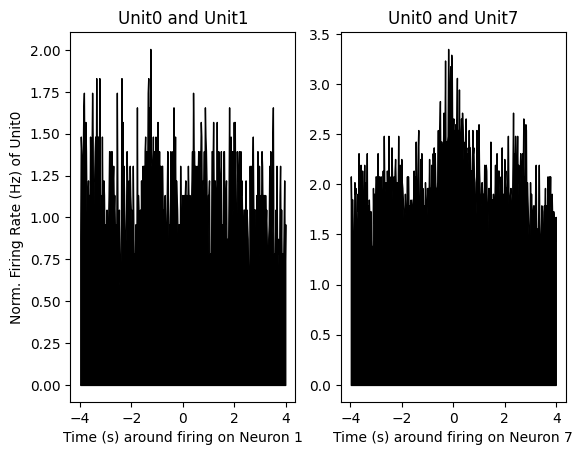

In [12]:
xtwake = cc_wake.index.values
plt.subplot(121)
plt.fill_between(
    xtwake, np.zeros_like(xtwake), cc_wake[0][1].values, color="k"
)
plt.title("Unit0 and Unit1")
plt.ylabel("Norm. Firing Rate (Hz) of Unit0")
plt.xlabel("Time (s) around firing on Neuron 1")
plt.subplot(122)
plt.fill_between(
    xtwake, np.zeros_like(xtwake), cc_wake[0][7].values, color="k"
)
plt.title('Unit0 and Unit7')
plt.xlabel("Time (s) around firing on Neuron 7")


In [18]:
cc_wake[0][7].values

array([2.07920643, 1.73267202, 1.84818349, 1.84818349, 1.32838189,
       1.50164909, 1.32838189, 2.0214507 , 1.90593923, 1.96369496,
       1.55940482, 1.32838189, 1.44389335, 1.90593923, 1.73267202,
       2.31022937, 1.67491629, 1.79042776, 1.67491629, 2.1947179 ,
       1.90593923, 1.73267202, 2.13696216, 1.73267202, 1.84818349,
       1.79042776, 2.1947179 , 1.67491629, 2.0214507 , 1.73267202,
       1.79042776, 2.31022937, 1.27062615, 1.79042776, 1.44389335,
       1.84818349, 1.67491629, 1.32838189, 1.73267202, 1.38613762,
       1.38613762, 1.27062615, 1.27062615, 1.96369496, 1.61716056,
       1.90593923, 1.61716056, 1.79042776, 2.07920643, 2.07920643,
       1.90593923, 1.61716056, 2.31022937, 1.84818349, 2.07920643,
       2.07920643, 1.73267202, 1.84818349, 2.07920643, 1.67491629,
       1.27062615, 1.84818349, 2.13696216, 1.79042776, 2.48349657,
       1.96369496, 1.96369496, 2.0214507 , 1.73267202, 1.79042776,
       2.13696216, 1.96369496, 1.73267202, 2.48349657, 1.90593

# Exploring the LFP data

You can specifically select the "CSC1" channel as such:


In [20]:
data['ElectricalSeries']["CSC1"]

Time (s)
-------------  ---------
8145.353771    -22.7973
8145.35380225  -25.5135
8145.3538335   -17.3345
8145.35386475   -6.89718
8145.353896     -9.49126
...
9466.121646     -2.07526
9466.12167725   -1.06815
9466.1217085     1.03763
9466.12173975    2.28889
9466.121771     -6.13422
dtype: float64, shape: (40848770,)

## Indexing with Pynapple

In [56]:
# getting start and stop times to extract data
events = data["epochs"] # getting events from the NWB file
start_time = events["rec0"]["start"].to_numpy()[0]
stop_time = events["rec0"]["end"].to_numpy()[0]

# restrict data to specific time points
ep = nap.IntervalSet(start=start_time, end=stop_time)
print(ep)
rec0_data = data["ElectricalSeries"].restrict(ep)
print(rec0_data)

# index
print()
print("Indexing the first 10 data points from CSC1")
print(rec0_data["CSC1"][0:10])


         start          end
0  8145.353771  8446.868771
Time (s)             CSC1      CSC2      CSC3      CSC4       CSC5  ...
-------------  ----------  --------  --------  --------  ---------  -----
8145.353771     -22.7973   -26.4595  -18.5247  -25.8492    8.72829  ...
8145.35380225   -25.5135   -28.2296  -16.1138  -26.2764   24.2012   ...
8145.3538335    -17.3345   -29.4198  -17.7007  -27.1004   20.1117   ...
8145.35386475    -6.89718  -29.2367  -20.3558  -27.7718    1.67852  ...
8145.353896      -9.49126  -29.7861  -23.896   -27.8939  -12.3905   ...
...
8446.868646    -104.801    -90.762   -98.6663  -86.7641  -41.8409   ...
8446.86867725   -90.5179   -74.6178  -84.1701  -74.1905  -31.251    ...
8446.8687085    -79.989    -62.0746  -76.3268  -67.9342  -31.7393   ...
8446.86873975   -79.0735   -65.0655  -79.8364  -70.6504  -37.0495   ...
8446.868771     -86.1232   -75.9301  -86.9167  -75.7164  -35.2489   ...
dtype: float64, shape: (9648481, 16)

Indexing the first 10 data points fr

## Power

In [ ]:
from scipy.signal import welch

# getting start and stop times to extract data
events = data["epochs"] # getting events from the NWB file
start_time = events["rec1"]["start"].to_numpy()[0]
stop_time = events["rec1"]["end"].to_numpy()[0]

# restrict data to specific time points
ep = nap.IntervalSet(start=start_time, end=stop_time)
rec1_data = data["ElectricalSeries"].restrict(ep)

# power analysis
fs = 32000
lfp = rec0_data["CSC1"][0:32000]
f,Ptemp = welch(lfp,fs,nperseg=fs) # welches
idxspec = np.where((f>1) & (f<100)) # index to restrict
fSpec = f[idxspec] # restrict
PSpec = Ptemp[idxspec] #extract

# log10 transform
PSpecLog = np.log10(PSpec) # log transform

# NWB to spikeinterface
SpikeInterface has some really cool tools, specifically dedicated to spike sorting. Some of these tools can be used for things like data filtering and such

In [19]:
import spikeinterface as si
import spikeinterface.extractors as se
from spikeinterface.preprocessing import bandpass_filter, common_reference, detect_bad_channels, remove_artifacts

### Load in the NWB file that we created using decode_lab_code

In [20]:
nwbdata = se.read_nwb_recording(file_path=nwbpath)

##### Bandpass filter

In [21]:
# bandpass filter
recording_theta = bandpass_filter(recording=nwbdata, freq_min=4, freq_max=12)
recording_fasto = bandpass_filter(recording=nwbdata, freq_min=300, freq_max=9000)

#### Get recording traces

In [22]:
traces = nwbdata.get_traces(start_frame=0, end_frame=32000, segment_index=0)
filt_traces_theta = recording_theta.get_traces(start_frame=0, end_frame=32000)
filt_traces_fasto = recording_fasto.get_traces(start_frame=0, end_frame=32000)


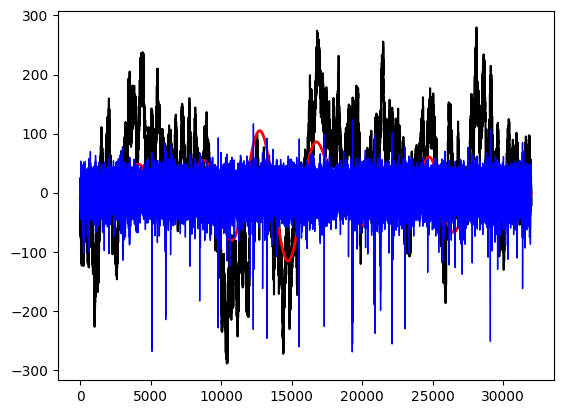

In [23]:
plt.plot(traces[:,0],color='k')
plt.plot(filt_traces_theta[:,0],color='r',linewidth=2)
plt.plot(filt_traces_fasto,color='b',linewidth=1)

## Rereference your signal

In [24]:
rec_cmr = common_reference(recording=nwbdata, operator="median", reference="global")

In [25]:
traces_cmr = rec_cmr.get_traces(start_frame=0, end_frame=32000, segment_index=0)
filt_cmr_fasto = bandpass_filter(recording=rec_cmr, freq_min=300, freq_max=9000).get_traces(start_frame=0, end_frame=32000)

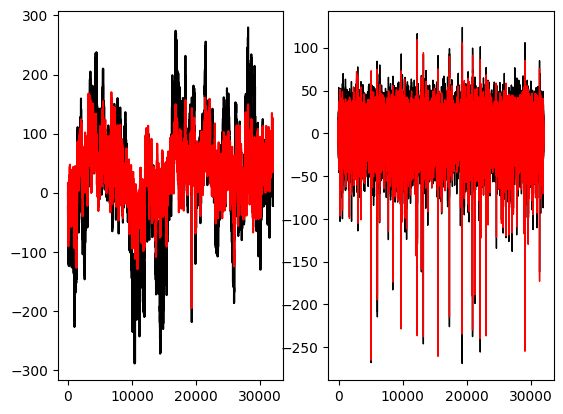

In [26]:
plt.subplot(1,2,1)
plt.plot(traces[:,0],color='k')
plt.plot(traces_cmr[:,0],color='r')

plt.subplot(1,2,2)
plt.plot(filt_traces_fasto,color='k',linewidth=1)
plt.plot(filt_cmr_fasto,color='r',linewidth=1)

## Spike sorting

In [27]:
from spikeinterface.sorters import run_sorter